# Assignment 2

## Problem 1:Linear Regression

### Task 1:Load the dataset named assignment2_part1.csv 



In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
%matplotlib inline

In [2]:
data = pd.read_csv("assignment2_part1.csv")

### Task 2:Split this given dataset into training set,testing set and validation set (80% data as training set,10% as validation and other 10% as testing). 
We suggest to split it serially taking the first 80% for training, next 10% for validatation, last 10% for test, to avoid unstable results. Random splits are also accepted as a solution however, but be aware that this way your results may change from run to run.

In [3]:
dataTrain = data.loc[:64] #Training set, 80% of 80 is 64 
dataTest = data.loc[64:72] #Testing Set, 10% is 8
dataVal = data.loc[72:80] #Validation set

In [4]:
dataTrain.head()

,Unnamed: 0,x,y
0,0,-15.0,-2156.994097
1,1,-14.5,-1956.523904
2,2,-14.0,-1778.151738
3,3,-13.5,-1610.924846
4,4,-13.0,-1456.176307


### Task 3: Visualize the training data and try to fit a linear (regression) model to it and comment whether you think this data is suitable to fit a linear model.

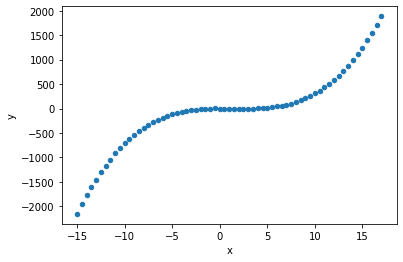

In [5]:
dataTrain.plot(x = 'x', y = 'y', kind = 'scatter')

This looks roughly like a third degree polynomial, not a linear model

### Task 4: Visualize the regression fit

In [6]:
lm = smf.ols(formula='y~x', data = dataTrain).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     316.0
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           3.08e-26
Time:                        09:46:46   Log-Likelihood:                -468.25
No. Observations:                  65   AIC:                             940.5
Df Residuals:                      63   BIC:                             944.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -125.3147     41.223     -3.040      0.0

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


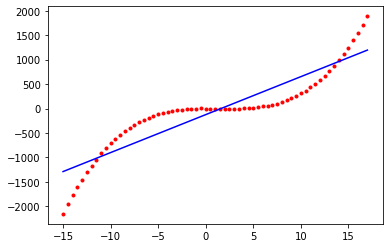

In [7]:
dataTrain['ypred']=lm.predict() #predicted regression values
plt.plot(dataTrain.x,dataTrain.y,'.r') #plot the data
plt.plot(dataTrain.x,dataTrain.ypred,'b') #plot the regression

Not a great fit

### Task 5: Try to introduce another regressor variable (x**2) if you think that linear model was not apropriate for this.

In [8]:
dataTrain['x2']=dataTrain.x**2

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
lm_1 = smf.ols(formula='y~x2', data = dataTrain).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.741
Date:                Mon, 28 Oct 2019   Prob (F-statistic):              0.192
Time:                        09:46:47   Log-Likelihood:                -525.69
No. Observations:                  65   AIC:                             1055.
Df Residuals:                      63   BIC:                             1060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -191.6178    147.471     -1.299      0.1

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


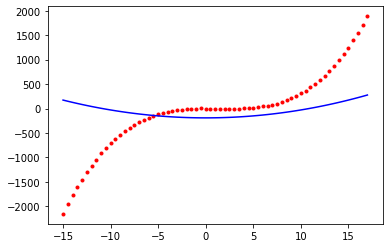

In [10]:
dataTrain['ypred_1']=lm_1.predict() #predicted regression values
plt.plot(dataTrain.x,dataTrain.y,'.r') #plot the data
plt.plot(dataTrain.x,dataTrain.ypred_1,'b') #plot the regression

### Task 6: Fit a regression model to it,now with 2 regressor variables(x,x**2) and also visualize the results

In [11]:
lm_ = smf.ols(formula='y~x+x2', data = dataTrain).fit()
print(lm_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     158.3
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           4.39e-25
Time:                        09:46:47   Log-Likelihood:                -467.77
No. Observations:                  65   AIC:                             941.5
Df Residuals:                      62   BIC:                             948.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.9316     61.309     -1.336      0.1

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


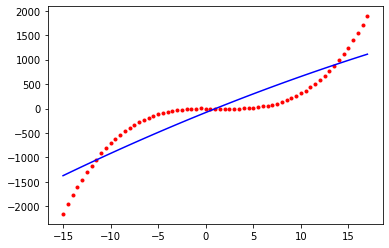

In [12]:
dataTrain['ypred_']=lm_.predict() #predicted regression values
plt.plot(dataTrain.x,dataTrain.y,'.r') #plot the data
plt.plot(dataTrain.x,dataTrain.ypred_,'b') #plot the regression

### Task 7: Generate regressors in the training and validation sample as powers of x from x ** 2 to x ** 12 (i.e max power M=12) and compute the model prediction.Visualize the fit of the model.

In [13]:
M=12
for p in range(1,M+1): #add more powers of x up to 12'th
    dataTrain['x{}'.format(p)]=dataTrain.x**p
dataTrain.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,x,y,ypred,x2,ypred_1,ypred_,x1,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0,-15.0,-2156.994097,-1290.553459,225.00,172.390949,-1374.327770,-15.0,-3375.000,50625.0000,-759375.00000,1.139062e+07,-1.708594e+08,2.562891e+09,-3.844336e+10,5.766504e+11,-8.649756e+12,1.297463e+14
1,1,-14.5,-1956.523904,-1251.712167,210.25,148.528153,-1327.632637,-14.5,-3048.625,44205.0625,-640973.40625,9.294114e+06,-1.347647e+08,1.954088e+09,-2.833427e+10,4.108469e+11,-5.957280e+12,8.638056e+13
2,2,-14.0,-1778.151738,-1212.870875,196.00,125.474264,-1281.186832,-14.0,-2744.000,38416.0000,-537824.00000,7.529536e+06,-1.054135e+08,1.475789e+09,-2.066105e+10,2.892547e+11,-4.049565e+12,5.669391e+13
3,3,-13.5,-1610.924846,-1174.029584,182.25,103.229284,-1234.990355,-13.5,-2460.375,33215.0625,-448403.34375,6.053445e+06,-8.172151e+07,1.103240e+09,-1.489375e+10,2.010656e+11,-2.714385e+12,3.664420e+13
4,4,-13.0,-1456.176307,-1135.188292,169.00,81.793212,-1189.043206,-13.0,-2197.000,28561.0000,-371293.00000,4.826809e+06,-6.274852e+07,8.157307e+08,-1.060450e+10,1.378585e+11,-1.792160e+12,2.329809e+13


In [14]:
#create a formulae for multi-variate regression using list comprehension
formula='y~x+'+'+'.join(['x{}'.format(p) for p in range(2,M+1)]); formula

'y~x+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.620e+05
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          3.21e-126
Time:                        09:46:48   Log-Likelihood:                -150.32
No. Observations:                  65   AIC:                             326.6
Df Residuals:                      52   BIC:                             354.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7028      0.979     -3.782      0.0

Text(0, 0.5, 'y')

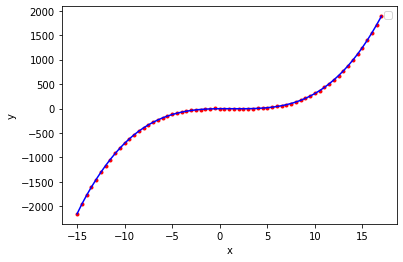

In [15]:
lm12 = smf.ols(formula=formula, data = dataTrain).fit()
print(lm12.summary())
dataTrain['ypred12']=lm12.predict() #predicted regression values
plt.plot(dataTrain.x,dataTrain.y,'.r') #plot the data
plt.plot(dataTrain.x,dataTrain.ypred12,'b') #plot the regression
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [16]:
M=12
for p in range(1,M+1): #add more powers of x up to 12'th
    dataVal['x{}'.format(p)]=dataVal.x**p
dataVal.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
72,72,21.0,3764.871416,21.0,441.00,9261.000,194481.0000,4.084101e+06,8.576612e+07,1.801089e+09,3.782286e+10,7.942800e+11,1.667988e+13,3.502775e+14,7.355828e+15
73,73,21.5,4064.435650,21.5,462.25,9938.375,213675.0625,4.594014e+06,9.877130e+07,2.123583e+09,4.565703e+10,9.816262e+11,2.110496e+13,4.537567e+14,9.755769e+15
74,74,22.0,4371.531453,22.0,484.00,10648.000,234256.0000,5.153632e+06,1.133799e+08,2.494358e+09,5.487587e+10,1.207269e+12,2.655992e+13,5.843183e+14,1.285500e+16
75,75,22.5,4704.656094,22.5,506.25,11390.625,256289.0625,5.766504e+06,1.297463e+08,2.919293e+09,6.568408e+10,1.477892e+12,3.325257e+13,7.481828e+14,1.683411e+16
76,76,23.0,5049.983454,23.0,529.00,12167.000,279841.0000,6.436343e+06,1.480359e+08,3.404825e+09,7.831099e+10,1.801153e+12,4.142651e+13,9.528098e+14,2.191462e+16


//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.880e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           3.47e-05
Time:                        09:46:50   Log-Likelihood:                -19.981
No. Observations:                   8   AIC:                             51.96
Df Residuals:                       2   BIC:                             52.44
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.298e-06   1.44e-05      0.368      0.7

Text(0, 0.5, 'y')

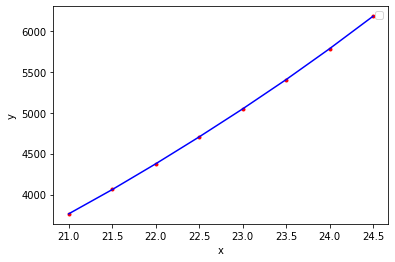

In [17]:
lm_13 = smf.ols(formula=formula, data = dataVal).fit()
print(lm_13.summary())
dataVal['ypred_13']=lm_13.predict() #predicted regression values
plt.plot(dataVal.x,dataVal.y,'.r') #plot the data
plt.plot(dataVal.x,dataVal.ypred_13,'b') #plot the regression
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Task 8:Train the polinomial model over training sample and compute R2 over the validation data for each power m=1,2,...12

In [18]:
formula='y~x'+'+'*(M>1)+'+'.join(['x{}'.format(p) for p in range(2,M+1)]); formula

'y~x+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12'

In [19]:
R2 = []; Params = []
for M in range(1,13):
    formula='y~x'+'+'*(M>1)+'+'.join(['x{}'.format(p) for p in range(2,M+1)]);
    lmR = smf.ols(formula = formula, data = dataVal).fit()
    R2.append(lmR.rsquared)
    Params.append(lmR.params)

In [20]:
R2

[0.9978048007714655,
 0.9999812594784018,
 0.9999842763175982,
 0.9999854671286187,
 0.9999854770809855,
 0.9999854748122115,
 0.9999855032597067,
 0.9999855625929867,
 0.999985652649405,
 0.9999857734059571,
 0.9999859254149694,
 0.9999861103708825]

M = 12 gives us the optimal R2, but we run into the issue of over-fitting.

### Task 9: What is the optimal value of $1\leq m\leq M$ in terms of the validation R2?

M=12 is the optimal value

### Task 10:Generate regressors in the test sample and compute the model prediction for the optimal m you found

In [21]:
M=12
for p in range(1,M+1): #add more powers of x up to 12'th
    dataTest['x{}'.format(p)]=dataTest.x**p
dataTest.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
64,64,17.0,1887.877609,17.0,289.00,4913.000,83521.0000,1.419857e+06,2.413757e+07,4.103387e+08,6.975757e+09,1.185879e+11,2.015994e+12,3.427190e+13,5.826222e+14
65,65,17.5,2081.877286,17.5,306.25,5359.375,93789.0625,1.641309e+06,2.872290e+07,5.026508e+08,8.796388e+09,1.539368e+11,2.693894e+12,4.714314e+13,8.250050e+14
66,66,18.0,2283.469520,18.0,324.00,5832.000,104976.0000,1.889568e+06,3.401222e+07,6.122200e+08,1.101996e+10,1.983593e+11,3.570467e+12,6.426841e+13,1.156831e+15
67,67,18.5,2497.509043,18.5,342.25,6331.625,117135.0625,2.166999e+06,4.008948e+07,7.416553e+08,1.372062e+10,2.538315e+11,4.695883e+12,8.687384e+13,1.607166e+15
68,68,19.0,2721.708052,19.0,361.00,6859.000,130321.0000,2.476099e+06,4.704588e+07,8.938717e+08,1.698356e+10,3.226877e+11,6.131066e+12,1.164903e+14,2.213315e+15


//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.957e+05
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           9.81e-09
Time:                        09:46:51   Log-Likelihood:                -11.434
No. Observations:                   9   AIC:                             34.87
Df Residuals:                       3   BIC:                             36.05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.114e-09   2.58e-07      0.031      0.9

Text(0, 0.5, 'y')

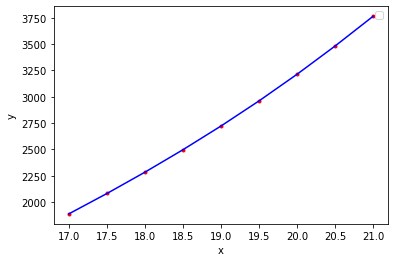

In [22]:
lmTest = smf.ols(formula=formula, data = dataTest).fit()
print(lmTest.summary())
dataTest['ypred_']=lmTest.predict() #predicted regression values
plt.plot(dataTest.x,dataTest.y,'.r') #plot the data
plt.plot(dataTest.x,dataTest.ypred_,'b') #plot the regression
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Task 11:Visulaize results of Task 10.

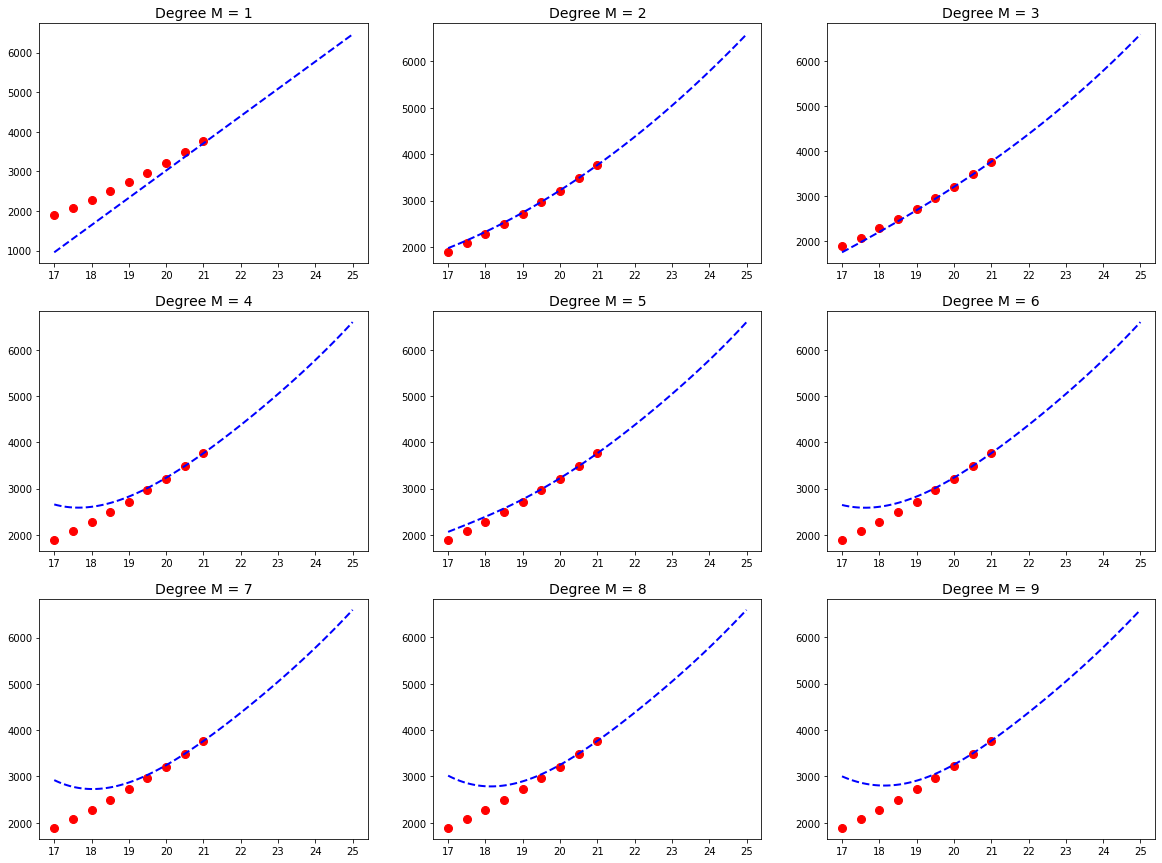

In [23]:
#visualize all the fits
plt.figure(figsize = (20,15))

for M in range(1,10):
    plt.subplot(330+M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(17,25,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(dataTest.x1, dataTest.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.title('Degree M = {}'.format(M), fontsize = 14)

## Problem 2:Refer to the in class session_05_02 diagnostics python notebook ,to complete this part of the assignment.

### Task 1: Perform regression of Income vs three regressors: Bachelor, "Advanced" (which aggregates Master, Doctorate and ProfSchool) and "Other" (aggregating all education levels less than Bachelor)

In [24]:
#Hint: you might want to use the dataframe "data4" in the session_05_02 diagnostics python notebook, creating new columns Advanced and Other first before running the regression
data4 = pd.read_csv('data/IncomeEduReg.csv')
data4.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679
3,10004,98020.0,2279,29,87,305,984,550,86,238
4,10005,99633.0,5954,133,103,454,2745,1637,219,663


In [25]:
data4['Advanced'] = data4.iloc[:,7:10].sum(axis=1)
data4['Other'] = data4.iloc[:,3:6].sum(axis=1)
data4.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Advanced,Other
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207,5138,5129
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149,5791,42420
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679,14399,8825
3,10004,98020.0,2279,29,87,305,984,550,86,238,874,421
4,10005,99633.0,5954,133,103,454,2745,1637,219,663,2519,690


In [26]:
data4.dropna(inplace = True)  #drop NAN to avoid invalid computation

In [27]:
data4['Income']=data4['IncomePerCapita']*data4['PopOver25'] #calculate total income

In [28]:
lm4 = smf.ols(formula = 'Income ~ Bachelor + Advanced + Other -1', data = data4).fit()
print(lm4.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Income   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1106.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                   8.50e-115
Time:                        09:46:54   Log-Likelihood:                         -3804.4
No. Observations:                 181   AIC:                                      7615.
Df Residuals:                     178   BIC:                                      7624.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Task 2: Visualize the regression fit by plotting the observations versus regression prediction for the income per each zip code (as a scatter plot)

No handles with labels found to put in legend.


Text(0, 0.5, 'y')

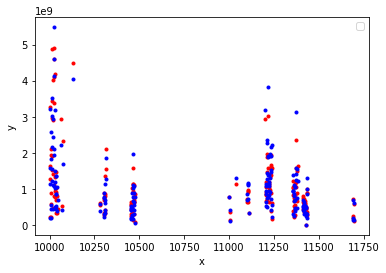

In [29]:
data4['Income_Predict'] = lm4.predict()
plt.plot(data4['Zipcode'],data4['Income'],'.r') #plot the data
plt.plot(data4['Zipcode'],data4['Income_Predict'],'.b') #plot the regression
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

## Problem 3:Refer to in class session_05_01 Scaling python notebook to complete this part of the assignment.

### Task 1:Establish a scaling relationship  $Y\sim CX^q$  between total, violent and property crime vs population for each city (msa)
by running log-scale regression where Crime>0. Visualize on the log scale. Does $q=1$ fall into the 95% confidence interval? What about 99% CI?

In [30]:
#Your code here
crime2014 = pd.read_csv('data/crime2014/R11460954_SL050.csv') #Load crime data

In [31]:
#You have to aggregate the data per msa first; please use the following dataframe for that similarly to how it has been done in the class notebook
msa = pd.read_csv('data/msalist.csv', encoding = 'latin1')

In [32]:
#rename some columns
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)


crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent Crimes', 'Property Crimes']]
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923


In [33]:
demographics = pd.read_csv('data/acs2014/R11460953_SL050.csv', encoding = 'latin1')

In [34]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [35]:
demographics['Income']=demographics.Population*demographics['Per capita income']

In [36]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [37]:
msaDemo = demomsa.groupby(['msa', 'msa_name']).sum().loc[:,[u'Population', u'Area', u'Income']]
msaDemo.head()

,,Population,Area,Income
msa,msa_name,,,
10180,"Abilene, TX (Metropolitan Statistical Area)",167171,2743.478027,3740034900
10420,"Akron, OH (Metropolitan Statistical Area)",703017,900.129156,19560044574
10500,"Albany, GA (Metropolitan Statistical Area)",156706,1932.557130,3172077530
10540,"Albany, OR (Metropolitan Statistical Area)",118270,2290.129282,2526602010
10580,"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",875567,2811.554500,28078339939


In [38]:
msaDemo.shape

(379, 3)

In [39]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)

crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,"Calhoun County, Alabama",1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [40]:
crimemsatop = crimemsa.head()
list(crimemsatop.index)

[0, 1, 2, 3, 4]

In [41]:
msacrime = crimemsa.groupby(['msa', 'msa_name']).sum().loc[:,[u'Population', u'Crimes', u'Violent Crimes', u'Property Crimes']]
msacrime.head()

,,Population,Crimes,Violent Crimes,Property Crimes
msa,msa_name,,,,
10180,"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430
10420,"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291
10500,"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257
10540,"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069
10580,"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499


In [42]:
msacrime.shape

(347, 4)

In [43]:
crimemsa1 = msacrime.merge(msaDemo.Income, on = 'msa_name', left_index = True, how='inner')
crimemsa1.head()

,Population,Crimes,Violent Crimes,Property Crimes,Income
msa_name,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939


In [44]:
msacrime_ = crimemsa1.loc[(crimemsa1.Crimes  > 0)]

In [45]:
msacrime_.sort_values(by = ['Crimes'])

,Population,Crimes,Violent Crimes,Property Crimes,Income
msa_name,,,,,
"Altoona, PA (Metropolitan Statistical Area)",125955.0,1,1,0,3013749780
"Erie, PA (Metropolitan Statistical Area)",278443.0,2,0,2,6864634660
"Ocean City, NJ (Metropolitan Statistical Area)",95344.0,3,2,1,3225484714
"Allentown-Bethlehem-Easton, PA-NJ (Metropolitan Statistical Area)",407571.0,3,0,3,24289637683
"York-Hanover, PA (Metropolitan Statistical Area)",440755.0,5,5,0,12464331608
"Reading, PA (Metropolitan Statistical Area)",413691.0,5,5,0,11150605968
"Boston-Cambridge-Newton, MA-NH (Metropolitan Statistical Area)",300621.0,9,5,4,184043450222
"Pittsburgh, PA (Metropolitan Statistical Area)",2154097.0,17,12,5,71406600720
"Pocatello, ID (Metropolitan Statistical Area)",83347.0,65,7,58,1825578054


In [46]:
msacrime_['LogPop'] = np.log(msacrime_.Population)
msacrime_['LogTot'] = np.log(msacrime_.Crimes)
msacrime_['LogVio'] = np.log(msacrime_['Violent Crimes'])
msacrime_['LogProp'] = np.log(msacrime_['Property Crimes'])
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCo

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp
msa_name,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553


In [47]:
msacrime_['LogVio'] = msacrime_['LogVio'].replace([np.inf, -np.inf], np.nan)
msacrime_['LogProp'] = msacrime_['LogProp'].replace([np.inf, -np.inf], np.nan)
msacrime_['LogPop'] = msacrime_['LogPop'].fillna(0)
msacrime_['LogTot'] = msacrime_['LogTot'].fillna(0)
msacrime_['LogVio'] = msacrime_['LogVio'].fillna(0)
msacrime_['LogProp'] = msacrime_['LogProp'].fillna(0)
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp
msa_name,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553


In [48]:
msacrime_['LogVio'].min() #confirming code above worked

0.0

In [49]:
lmTot = smf.ols('LogTot ~ LogPop-1', data = msacrime_).fit()
lmTot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 LogTot   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                          1.130e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                   1.02e-260
Time:                        09:46:56   Log-Likelihood:                         -550.45
No. Observations:                 337   AIC:                                      1103.
Df Residuals:                     336   BIC:                                      1107.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LogPop         0.5710      0.005    106.305      0.000       0.560       0.582
==============================================================================
Omnibus:                      201.199   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1739.584
Skew:                          -2.390   Prob(JB):                         0.00
Kurtosis:                      13.051   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
lmTot.conf_int(alpha=0.05)

,0,1
LogPop,0.560459,0.581591


In [51]:
lmTot.conf_int(alpha=0.01)

,0,1
LogPop,0.55711,0.58494


We are 99% confident that q = 1 does not fall in this interval.

In [52]:
lmVio = smf.ols('LogVio ~ LogPop-1', data = msacrime_).fit()
lmVio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 LogVio   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              5451.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                   9.77e-210
Time:                        09:46:56   Log-Likelihood:                         -550.65
No. Observations:                 337   AIC:                                      1103.
Df Residuals:                     336   BIC:                                      1107.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LogPop         0.3968      0.005     73.828      0.000       0.386       0.407
==============================================================================
Omnibus:                       34.336   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.382
Skew:                          -0.602   Prob(JB):                     4.69e-14
Kurtosis:                       4.710   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
lmVio.conf_int(alpha=0.05)

,0,1
LogPop,0.386233,0.407378


In [54]:
lmVio.conf_int(alpha=0.01)

,0,1
LogPop,0.382882,0.410729


We are 99% confident that q = 1 does not fall in this interval.

In [55]:
lmProp = smf.ols('LogProp ~ LogPop-1', data = msacrime_).fit()
lmProp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                LogProp   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              9567.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                   6.09e-249
Time:                        09:46:56   Log-Likelihood:                         -571.70
No. Observations:                 337   AIC:                                      1145.
Df Residuals:                     336   BIC:                                      1149.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LogPop         0.5596      0.006     97.809      0.000       0.548       0.571
==============================================================================
Omnibus:                      227.702   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2437.438
Skew:                          -2.731   Prob(JB):                         0.00
Kurtosis:                      14.990   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
lmProp.conf_int(alpha=0.05)

,0,1
LogPop,0.548327,0.570835


In [57]:
lmProp.conf_int(alpha=0.01)

,0,1
LogPop,0.54476,0.574402


We are 99% confident that q = 1 does not fall in this interval.

No handles with labels found to put in legend.


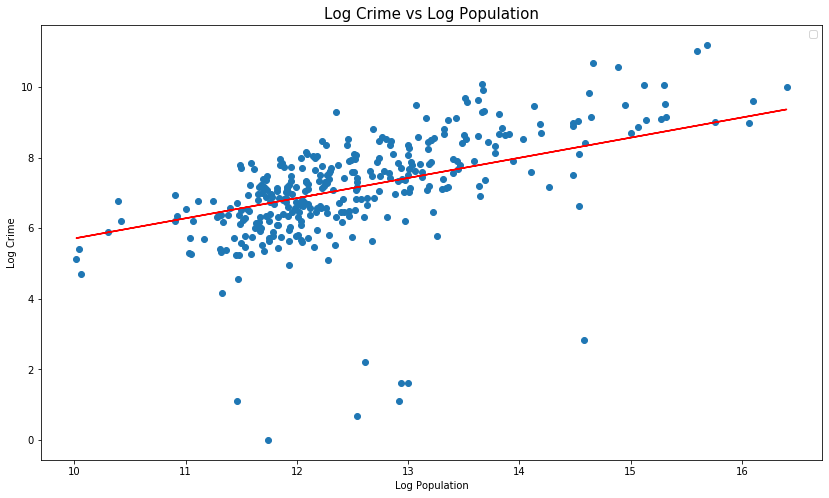

In [58]:
plt.figure(figsize=(14,8))
plt.plot(msacrime_['LogPop'], msacrime_['LogTot'], 'o')
plt.title('Log Crime vs Log Population', fontsize = 15)
plt.xlabel('Log Population')
plt.ylabel('Log Crime')
plt.plot(msacrime_['LogPop'], lmTot.predict(), '-r')
plt.legend()

No handles with labels found to put in legend.


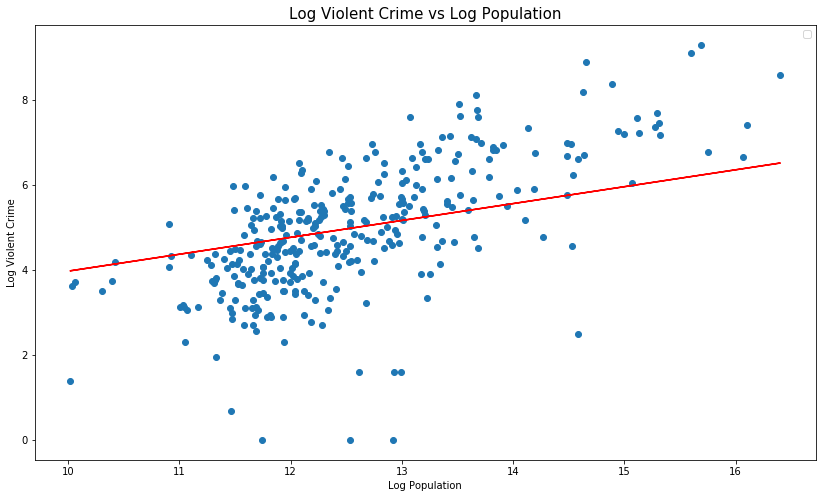

In [59]:
plt.figure(figsize=(14,8))
plt.plot(msacrime_['LogPop'], msacrime_['LogVio'], 'o')
plt.title('Log Violent Crime vs Log Population', fontsize = 15)
plt.xlabel('Log Population')
plt.ylabel('Log Violent Crime')
plt.plot(msacrime_['LogPop'], lmVio.predict(), '-r')
plt.legend()

No handles with labels found to put in legend.


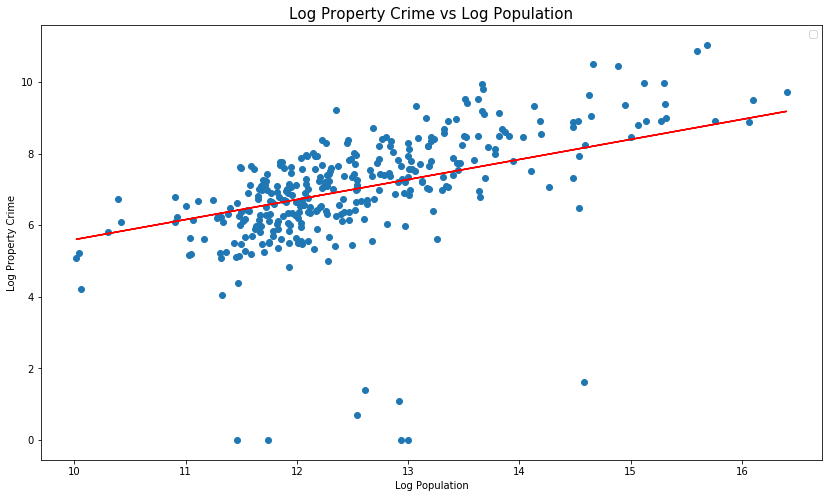

In [60]:
plt.figure(figsize=(14,8))
plt.plot(msacrime_['LogPop'], msacrime_['LogProp'], 'o')
plt.title('Log Property Crime vs Log Population', fontsize = 15)
plt.xlabel('Log Population')
plt.ylabel('Log Property Crime')
plt.plot(msacrime_['LogPop'], lmProp.predict(), '-r')
plt.legend()

### Task 2: Find top 5 and last 5 cities (msa) by crime log-residual (difference between log-crime and above regression prediction)

In [61]:
msacrime_['predicted crime'] = lmTot.predict()
msacrime_['logdiff'] = msacrime_['predicted crime']-msacrime_['LogTot']
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff
msa_name,,,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785,6.872423,0.673944
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744,7.688445,-0.093528
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483,6.812023,-0.406154
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479,6.675207,-0.320559
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553,7.816116,0.444627


In [62]:
msacrime_.nlargest(5, 'logdiff')

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff
msa_name,,,,,,,,,,,
"Altoona, PA (Metropolitan Statistical Area)",125955.0,1,1,0,3013749780,11.743680,0.000000,0.000000,0.000000,6.705936,6.705936
"Erie, PA (Metropolitan Statistical Area)",278443.0,2,0,2,6864634660,12.536969,0.693147,0.000000,0.693147,7.158924,6.465777
"Allentown-Bethlehem-Easton, PA-NJ (Metropolitan Statistical Area)",407571.0,3,0,3,24289637683,12.917970,1.098612,0.000000,1.098612,7.376486,6.277873
"York-Hanover, PA (Metropolitan Statistical Area)",440755.0,5,5,0,12464331608,12.996244,1.609438,1.609438,0.000000,7.421182,5.811744
"Reading, PA (Metropolitan Statistical Area)",413691.0,5,5,0,11150605968,12.932875,1.609438,1.609438,0.000000,7.384996,5.775558


In [63]:
msacrime_.nsmallest(5, 'logdiff')

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff
msa_name,,,,,,,,,,,
"Orlando-Kissimmee-Sanford, FL (Metropolitan Statistical Area)",2321418.0,43637,7202,36435,55394204216,14.657689,10.683661,8.882114,10.503285,8.369909,-2.313752
"Greenville-Anderson-Mauldin, SC (Metropolitan Statistical Area)",862463.0,24316,3316,21000,20718989847,13.667548,10.098890,8.106515,9.952278,7.804513,-2.294377
"Macon-Bibb County, GA (Metropolitan Statistical Area)",230450.0,10881,869,10012,5075593274,12.347789,9.294773,6.767343,9.211540,7.050898,-2.243876
"Houston-The Woodlands-Sugar Land, TX (Metropolitan Statistical Area)",6490180.0,73010,10805,62205,183604231249,15.685801,11.198352,9.287764,11.038191,8.956986,-2.241365
"Miami-Fort Lauderdale-West Palm Beach, FL (Metropolitan Statistical Area)",5929819.0,61438,8873,52565,157318026642,15.595504,11.025784,9.090768,10.869806,8.905425,-2.120359


### Task 3:Is there any correlation between residual by income and residual by crime?

In [64]:
lmIn = smf.ols('Income ~ Population-1', data = msacrime_).fit()
lmIn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              1448.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                   7.73e-124
Time:                        09:46:58   Log-Likelihood:                         -8561.4
No. Observations:                 337   AIC:                                  1.712e+04
Df Residuals:                     336   BIC:                                  1.713e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population  3.669e+04    964.228     38.048      0.000    3.48e+04    3.86e+04
==============================================================================
Omnibus:                      546.223   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178403.028
Skew:                           8.664   Prob(JB):                         0.00
Kurtosis:                     114.378   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
msacrime_['logIn'] = np.log(msacrime_['Income'])
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn
msa_name,,,,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785,6.872423,0.673944,22.042361
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744,7.688445,-0.093528,23.696755
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483,6.812023,-0.406154,21.877653
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479,6.675207,-0.320559,21.650141
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553,7.816116,0.444627,24.058264


In [66]:
lmIn_ = smf.ols('logIn ~ LogPop-1', data = msacrime_).fit()
lmIn_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  logIn   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.768e+05
Date:                Mon, 28 Oct 2019   Prob (F-statistic):                        0.00
Time:                        09:46:58   Log-Likelihood:                         -476.48
No. Observations:                 337   AIC:                                      955.0
Df Residuals:                     336   BIC:                                      958.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LogPop         1.8133      0.004    420.424      0.000       1.805       1.822
==============================================================================
Omnibus:                       27.259   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.206
Skew:                           0.308   Prob(JB):                     1.04e-17
Kurtosis:                       5.278   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
msacrime_['PredIncome'] = lmIn_.predict()
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn,PredIncome
msa_name,,,,,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785,6.872423,0.673944,22.042361,21.822959
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744,7.688445,-0.093528,23.696755,24.414188
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483,6.812023,-0.406154,21.877653,21.631163
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479,6.675207,-0.320559,21.650141,21.196713
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553,7.816116,0.444627,24.058264,24.819600


In [68]:
msacrime_.corr()

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn,PredIncome
Population,1.000000,0.593422,0.606605,0.587804,0.885420,0.749553,0.435110,0.480098,0.413550,0.749553,-0.153047,0.719114,0.749553
Crimes,0.593422,1.000000,0.971374,0.999183,0.446406,0.581833,0.595683,0.629352,0.574478,0.581833,-0.431308,0.534833,0.581833
Violent Crimes,0.606605,0.971374,1.000000,0.960980,0.438314,0.552549,0.549260,0.617181,0.524511,0.552549,-0.389680,0.501675,0.552549
Property Crimes,0.587804,0.999183,0.960980,1.000000,0.445244,0.583506,0.600193,0.627843,0.579711,0.583506,-0.435938,0.537433,0.583506
Income,0.885420,0.446406,0.438314,0.445244,1.000000,0.644956,0.325171,0.365580,0.306182,0.644956,-0.072054,0.702845,0.644956
LogPop,0.749553,0.581833,0.552549,0.583506,0.644956,1.000000,0.592872,0.656661,0.561762,1.000000,-0.219182,0.919347,1.000000
LogTot,0.435110,0.595683,0.549260,0.600193,0.325171,0.592872,1.000000,0.926448,0.995436,0.592872,-0.915662,0.517358,0.592872
LogVio,0.480098,0.629352,0.617181,0.627843,0.365580,0.656661,0.926448,1.000000,0.898551,0.656661,-0.794708,0.573202,0.656661
LogProp,0.413550,0.574478,0.524511,0.579711,0.306182,0.561762,0.995436,0.898551,1.000000,0.561762,-0.925660,0.488220,0.561762
predicted crime,0.749553,0.581833,0.552549,0.583506,0.644956,1.000000,0.592872,0.656661,0.561762,1.000000,-0.219182,0.919347,1.000000


In [69]:
#msacrime_['predicted income'] = lmTot.predict()
msacrime_['logdiffIn'] = msacrime_['PredIncome']-msacrime_['logIn']
msacrime_.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn,PredIncome,logdiffIn
msa_name,,,,,,,,,,,,,,
"Abilene, TX (Metropolitan Statistical Area)",168592.0,492,62,430,3740034900,12.035237,6.198479,4.127134,6.063785,6.872423,0.673944,22.042361,21.822959,-0.219402
"Akron, OH (Metropolitan Statistical Area)",703825.0,2397,106,2291,19560044574,13.464285,7.781973,4.663439,7.736744,7.688445,-0.093528,23.696755,24.414188,0.717434
"Albany, GA (Metropolitan Statistical Area)",151670.0,1364,107,1257,3172077530,11.929462,7.218177,4.672829,7.136483,6.812023,-0.406154,21.877653,21.631163,-0.246490
"Albany, OR (Metropolitan Statistical Area)",119356.0,1092,23,1069,2526602010,11.689866,6.995766,3.135494,6.974479,6.675207,-0.320559,21.650141,21.196713,-0.453428
"Albany-Schenectady-Troy, NY (Metropolitan Statistical Area)",880167.0,1590,91,1499,28078339939,13.687867,7.371489,4.510860,7.312553,7.816116,0.444627,24.058264,24.819600,0.761335


In [70]:
msacrime_.corr()

,Population,Crimes,Violent Crimes,Property Crimes,Income,LogPop,LogTot,LogVio,LogProp,predicted crime,logdiff,logIn,PredIncome,logdiffIn
Population,1.000000,0.593422,0.606605,0.587804,0.885420,0.749553,0.435110,0.480098,0.413550,0.749553,-0.153047,0.719114,0.749553,0.626147
Crimes,0.593422,1.000000,0.971374,0.999183,0.446406,0.581833,0.595683,0.629352,0.574478,0.581833,-0.431308,0.534833,0.581833,0.513911
Violent Crimes,0.606605,0.971374,1.000000,0.960980,0.438314,0.552549,0.549260,0.617181,0.524511,0.552549,-0.389680,0.501675,0.552549,0.495486
Property Crimes,0.587804,0.999183,0.960980,1.000000,0.445244,0.583506,0.600193,0.627843,0.579711,0.583506,-0.435938,0.537433,0.583506,0.514123
Income,0.885420,0.446406,0.438314,0.445244,1.000000,0.644956,0.325171,0.365580,0.306182,0.644956,-0.072054,0.702845,0.644956,0.438511
LogPop,0.749553,0.581833,0.552549,0.583506,0.644956,1.000000,0.592872,0.656661,0.561762,1.000000,-0.219182,0.919347,1.000000,0.883111
LogTot,0.435110,0.595683,0.549260,0.600193,0.325171,0.592872,1.000000,0.926448,0.995436,0.592872,-0.915662,0.517358,0.592872,0.556598
LogVio,0.480098,0.629352,0.617181,0.627843,0.365580,0.656661,0.926448,1.000000,0.898551,0.656661,-0.794708,0.573202,0.656661,0.616270
LogProp,0.413550,0.574478,0.524511,0.579711,0.306182,0.561762,0.995436,0.898551,1.000000,0.561762,-0.925660,0.488220,0.561762,0.529765
predicted crime,0.749553,0.581833,0.552549,0.583506,0.644956,1.000000,0.592872,0.656661,0.561762,1.000000,-0.219182,0.919347,1.000000,0.883111


There is a correlation of -0.233576